In [1]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
from matplotlib import colors

import numpy as np

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
def normalize(m):
    return m / 256

test_batches = image.ImageDataGenerator(preprocessing_function=normalize).flow_from_directory(
    '/data/yelp_restaurants/resized_images/test', 
    target_size=(250,250),
    class_mode=None, 
    shuffle=True, 
    batch_size=16
)

valid_batches = image.ImageDataGenerator(preprocessing_function=normalize).flow_from_directory(
    '/data/yelp_restaurants/resized_images/valid', 
    target_size=(250,250),
    class_mode=None, 
    shuffle=True, 
    batch_size=16
)

train_batches = image.ImageDataGenerator(preprocessing_function=normalize).flow_from_directory(
    '/data/yelp_restaurants/resized_images/train', 
    target_size=(250,250),
    class_mode=None, 
    shuffle=True, 
    batch_size=16
)

Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
Found 224311 images belonging to 1 classes.


In [4]:
imgs = next(train_batches)

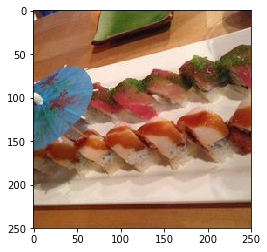

In [5]:
plt.imshow(imgs[10])

In [6]:
def input_and_output(img):
    return (colors.rgb_to_hsv(img)[:,:,:,2:3], img)

train_io_batches = map(input_and_output, train_batches)
valid_io_batches = map(input_and_output, valid_batches)
test_io_batches = map(input_and_output, test_batches)

# Model

In [7]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.optimizers import Nadam

model = Sequential([
    BatchNormalization(input_shape=(250,250,1)),
    Conv2D(32, (3, 3), padding="same"),
    Conv2D(32, (3, 3), padding="same"),
    Conv2D(32, (3, 3), padding="same"),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding="same"),
    Conv2D(64, (3, 3), padding="same"),
    Conv2D(64, (3, 3), padding="same"),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding="same"),
    Conv2D(128, (3, 3), padding="same"),
    Conv2D(128, (3, 3), padding="same"),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding="same"),
    Conv2D(64, (3, 3), padding="same"),
    Conv2D(64, (3, 3), padding="same"),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding="same"),
    Conv2D(32, (3, 3), padding="same"),
    Conv2D(32, (3, 3), padding="same"),
    BatchNormalization(),
    Conv2D(3, (3, 3), padding="same"),
])

opt = Nadam(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.06)
model.compile(optimizer=opt, loss='mean_squared_error')

In [8]:
opt.lr = 1e-5
model.fit_generator(train_io_batches, 100, validation_data=valid_io_batches, validation_steps=10)
opt.lr = 1e-2
model.fit_generator(train_io_batches, train_batches.samples/32, validation_data=valid_io_batches, validation_steps=10)
opt.lr = 1e-3
model.fit_generator(train_io_batches, train_batches.samples/32, validation_data=valid_io_batches, validation_steps=10)
opt.lr = 1e-4
model.fit_generator(train_io_batches, train_batches.samples/32, validation_data=valid_io_batches, validation_steps=100)
opt.lr = 1e-5
model.fit_generator(train_io_batches, train_batches.samples/32, validation_data=valid_io_batches, validation_steps=100)
opt.lr = 1e-6
model.fit_generator(train_io_batches, train_batches.samples/16, validation_data=valid_io_batches, validation_steps=100)

Epoch 1/1
100/100 [==============================] - 85s - loss: 0.3939 - val_loss: 0.2045
Epoch 1/1
7010/7009 [==============================] - 5533s - loss: 0.0713 - val_loss: 0.0128
Epoch 1/1
7010/7009 [==============================] - 5475s - loss: 0.0142 - val_loss: 0.0129
Epoch 1/1
7010/7009 [==============================] - 5503s - loss: 0.0140 - val_loss: 0.0136
Epoch 1/1
7010/7009 [==============================] - 5502s - loss: 0.0141 - val_loss: 0.0129
Epoch 1/1
14020/14019 [==============================] - 10970s - loss: 0.0140 - val_loss: 0.0139


In [42]:
imgs = next(test_batches)

In [43]:
img = imgs[0]
bw = colors.rgb_to_hsv(imgs)[0:1,:,:,2:3]

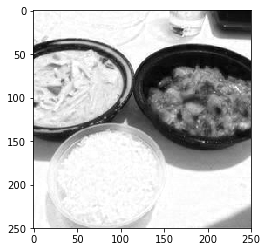

In [44]:
plt.imshow(np.squeeze(bw), cmap='gray')

In [45]:
colored = model.predict(bw)

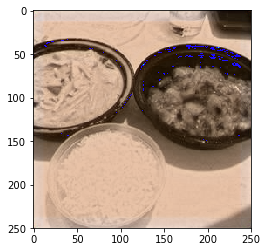

In [46]:
plt.imshow(np.squeeze(colored))

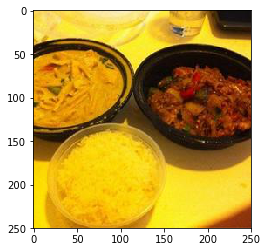

In [47]:
plt.imshow(imgs[0])

In [49]:
model.save_weights('/data/trained_models/colorize/v1.h5')